In [127]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [128]:
file_path = 'dataset/air_quality_data_fix.csv'
df = pd.read_csv(file_path)

df.head()

,latitude,longitude,dateTime,regionCode,universal_aqi,universal_aqi_category,dominant_pollutant,co,no2,o3,...,pm25,so2,health_general_population,health_elderly,health_lung_disease,health_heart_disease,health_athletes,health_pregnant_women,health_children,City
0,-7.294524,112.732623,2024-11-24T08:00:00Z,id,26,Low air quality,pm25,488.99,18.79,84.07,...,89.18,4.21,Reduce the intensity of your outdoor activitie...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Avoid intense activities outdoors or postpone ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Surabaya
1,-7.296518,112.639345,2024-11-24T08:00:00Z,id,19,Poor air quality,pm25,489.34,8.71,89.47,...,113.85,5.66,Avoid intense activities outdoors or postpone ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Surabaya
2,-7.251514,112.759883,2024-11-24T08:00:00Z,id,38,Low air quality,o3,492.09,16.41,78.74,...,45.67,3.64,Reduce the intensity of your outdoor activitie...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Avoid intense activities outdoors or postpone ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Surabaya
3,-7.283691,112.745216,2024-11-24T08:00:00Z,id,30,Low air quality,pm25,489.48,14.84,82.55,...,75.29,3.98,Reduce the intensity of your outdoor activitie...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Avoid intense activities outdoors or postpone ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Surabaya
4,-7.262437,112.721854,2024-11-24T08:00:00Z,id,30,Low air quality,pm25,491.03,16.86,82.08,...,75.09,4.18,Reduce the intensity of your outdoor activitie...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Avoid intense activities outdoors or postpone ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Surabaya


In [129]:
le = LabelEncoder()
if 'dominant_pollutant' in df.columns:
    df['dominant_pollutant'] = le.fit_transform(df['dominant_pollutant'])
else:
    raise ValueError("The 'dominant_pollutant' column is missing in the dataset.")

In [130]:
features = ['universal_aqi', 'co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'latitude', 'longitude']
if all(feature in df.columns for feature in features):
    X = df[features]
    y = df['dominant_pollutant']
else:
    raise ValueError("Some features are missing in the dataset.")

print(f"Shape of Features (X): {X.shape}")
print(f"Shape of Target (y): {y.shape}")

Shape of Features (X): (4503, 9)
Shape of Target (y): (4503,)


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Class distribution:")
print(y.value_counts())

print("\nClass distribution in training set:")
print(y_train.value_counts())

print("\nClass distribution in test set:")
print(y_test.value_counts())

Class distribution:
dominant_pollutant
2    3745
1     680
0      78
Name: count, dtype: int64

Class distribution in training set:
dominant_pollutant
2    2996
1     544
0      62
Name: count, dtype: int64

Class distribution in test set:
dominant_pollutant
2    749
1    136
0     16
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19584\1880393124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, order=y.value_counts().index, palette="viridis")


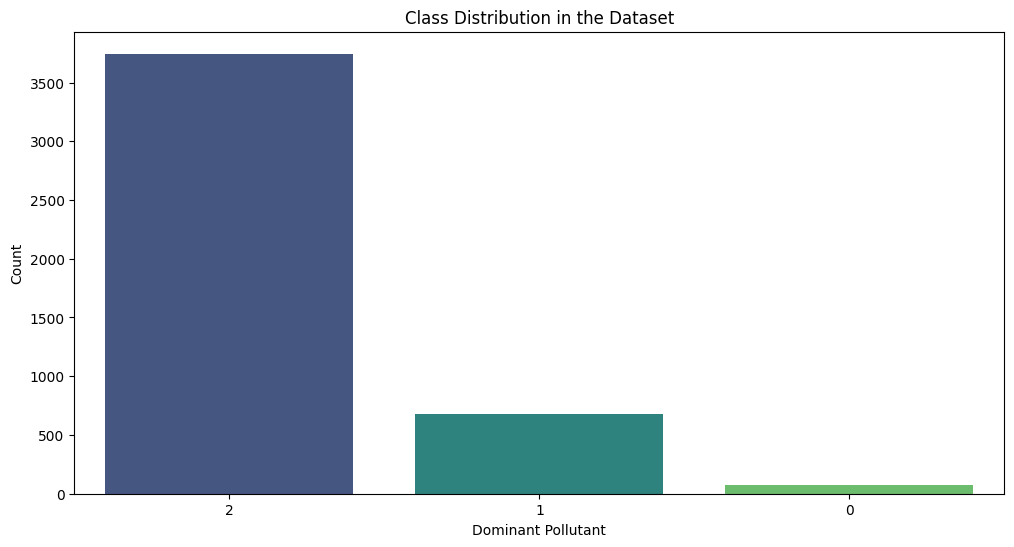

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19584\1880393124.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, order=y_train.value_counts().index, palette="coolwarm")


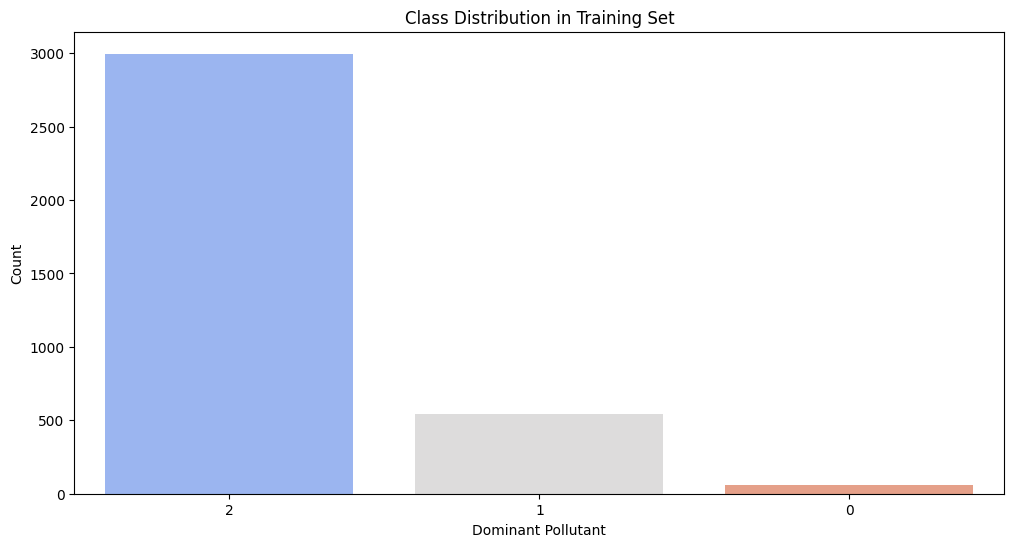

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19584\1880393124.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, order=y_test.value_counts().index, palette="coolwarm")


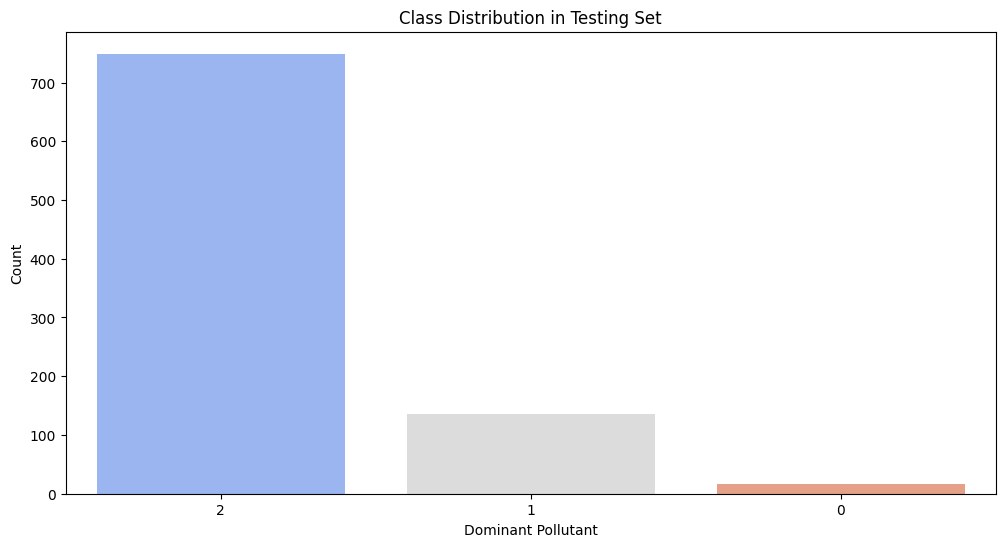

In [132]:
plt.figure(figsize=(12, 6))
sns.countplot(x=y, order=y.value_counts().index, palette="viridis")
plt.title("Class Distribution in the Dataset")
plt.xlabel("Dominant Pollutant")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train, order=y_train.value_counts().index, palette="coolwarm")
plt.title("Class Distribution in Training Set")
plt.xlabel("Dominant Pollutant")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x=y_test, order=y_test.value_counts().index, palette="coolwarm")
plt.title("Class Distribution in Testing Set")
plt.xlabel("Dominant Pollutant")
plt.ylabel("Count")
plt.show()

In [133]:
if y_train.nunique() < 2:
    raise ValueError("Training set contains only one class. Please ensure the dataset has multiple classes.")

In [134]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [135]:
y_pred = rf_model.predict(X_test)

print("\nRandom Forest Classifier Evaluation:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Random Forest Classifier Evaluation:
              precision    recall  f1-score   support

          o3       1.00      1.00      1.00        16
        pm10       1.00      1.00      1.00       136
        pm25       1.00      1.00      1.00       749

    accuracy                           1.00       901
   macro avg       1.00      1.00      1.00       901
weighted avg       1.00      1.00      1.00       901



<Figure size 1000x800 with 0 Axes>

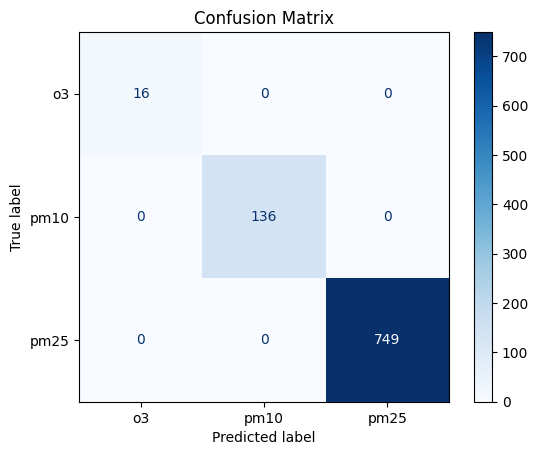

In [136]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19584\2385020549.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features_names, palette="viridis")


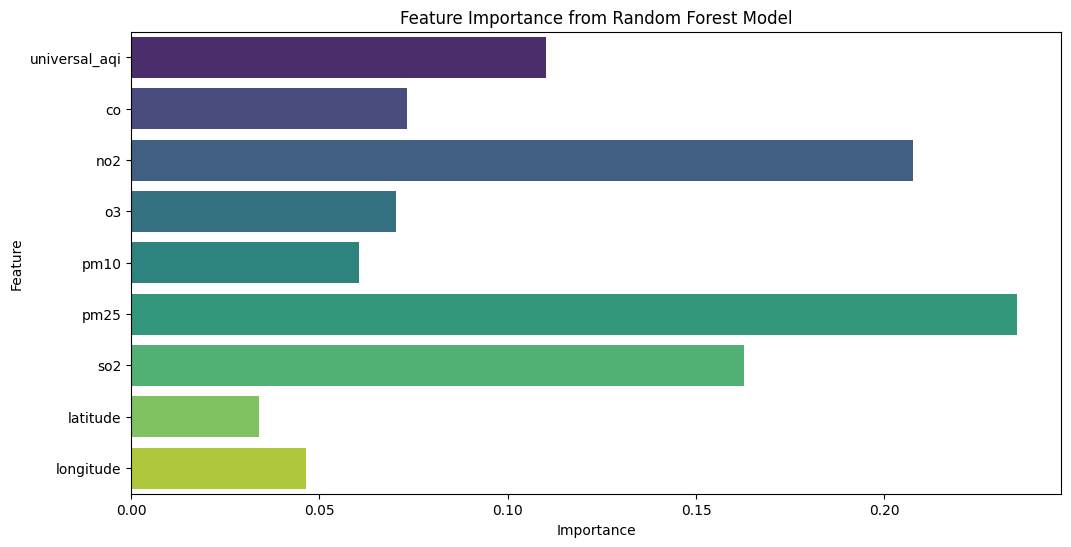

In [137]:
feature_importances = rf_model.feature_importances_
features_names = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=features_names, palette="viridis")
plt.title("Feature Importance from Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [138]:
y_pred = rf_model.predict(X_test)

results = pd.DataFrame({
    'Actual': le.inverse_transform(y_test),
    'Predicted': le.inverse_transform(y_pred)
})

results.head(10)

,Actual,Predicted
0,pm10,pm10
1,pm25,pm25
2,pm25,pm25
3,pm25,pm25
4,pm25,pm25
5,pm25,pm25
6,pm25,pm25
7,pm10,pm10
8,pm25,pm25
9,pm25,pm25


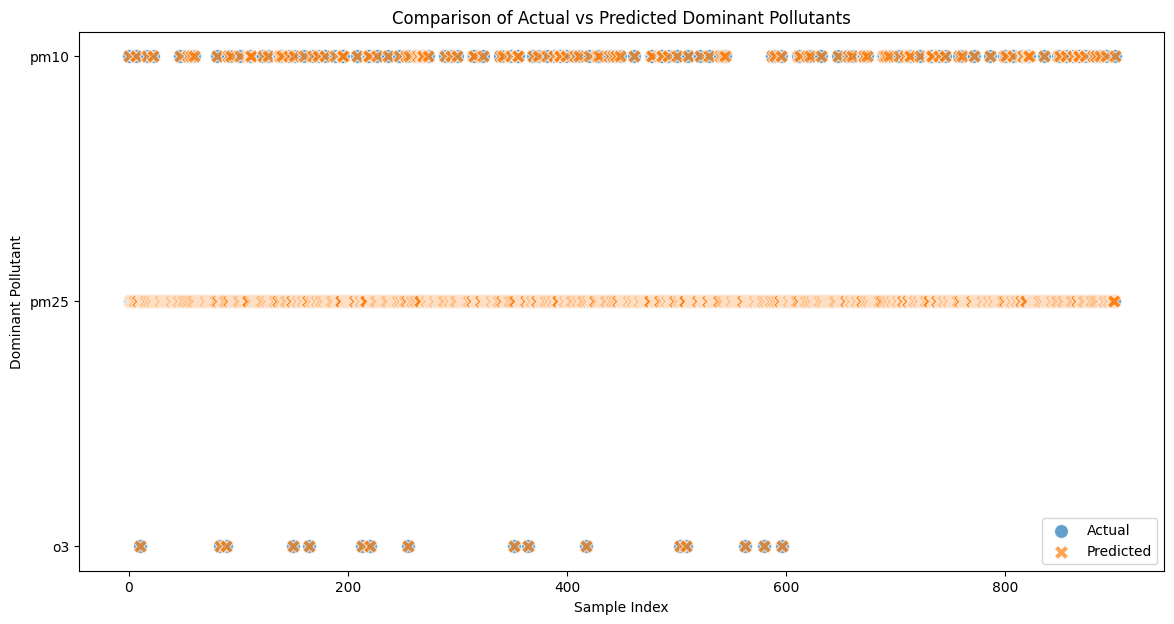

In [139]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=range(len(results)), y=results['Actual'], label='Actual', alpha=0.7, s=100, marker='o')
sns.scatterplot(x=range(len(results)), y=results['Predicted'], label='Predicted', alpha=0.7, s=100, marker='X')
plt.title("Comparison of Actual vs Predicted Dominant Pollutants")
plt.xlabel("Sample Index")
plt.ylabel("Dominant Pollutant")
plt.legend()
plt.show()

In [140]:
joblib.dump(rf_model, 'RandForModel.pkl')
print("Model saved successfully in 'RandForModel.pkl'")

Model saved successfully in 'RandForModel.pkl'
